## 作業1：
請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

選擇 **Telstra Network Disruptions** 這組資料

1. 你選的這組資料為何重要<br />
像 Telstra 這種電信商必須負擔龐大的網路流量，當線路或設備故障，勢必相當麻煩。而 Telstra 提供的 Dataset 包含服務中斷的嚴重程度等資訊，因此這問題重要的原因為「**企業的核心問題**」。<br />
<br />
2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)<br />
 資料直接由 Telstra 提供，包含設備發出的 log 紀錄和未提回報的嚴重度。而資料看起來也經過去識別化處理了。<br />
<br />
3. 蒐集而來的資料型態為何<br />
多個 csv 表格，以一個 event 的 id 做關聯，主要包含：
`id`事件唯一識別碼
`location`事件發生地點
`fault_severity`嚴重程度，分為0、1、2三級<br />
<br />
4. 這組資料想解決的問題如何評估<br />
主要是將資料分類，依照`id`、`location`去預測 (歸類) 為哪一種`fault_severity`。
競賽頁面的 Evaluation 顯示說，使用 **multi-class logarithmic loss**評估，模型針對每個標籤值預測的預測值，會被計算出 log loss，log loss 越小，表示預測的接受度越大。公式如下：
$$
logloss=-\frac{1}{N}{\sum_{i=1}^{N}}{\sum_{j=1}^{M}} y_{ij}log(p_{ij})
$$
$N$: number of rows. $M$: number of fault severity classes <br />
$y_{ij}$: is 1 if observation $i$ belongs to class $j$ and 0 otherwise.<br />
$p_{ij}$: the predicted probability that observation $i$ belongs to class $j$
 

## 作業2：
想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：
1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)<br/>
提升業績：自由載客車隊需要許多數據，能夠預測在客流量、尖峰時段、載客密集的地點等，以提升載客率。而尖峰時段預測、道路壅塞預測也是改善使用者體驗的重點。<br/><br />
2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)<br/>
需要路況資訊、載客起訖地點時間數據等。資料可透過 Open data 資訊及 Google Maps API 等獲得，若此自由載客車隊為一個平台，也可以從平台蒐集數據。<br/><br />
3. 蒐集而來的資料型態為何<br/>
地點：經緯座標範圍<br/>
時間：HH:mm:ss ddd<br/>
路況：良好、略塞、超塞<br/>
交易：出發點、終點、出發時間、結束時間<br/><br />
5. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)<br/>
預測甚麼時段、哪裡需要載客：ROC<br/><br />

## 作業3：

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mean_squared_error(y, y_hat):
    """
    計算 MSE
    :param y: 實際值 
    :param y_hat: 預測值
    :return: MSE
    """
    return np.sum(np.power((y - y_hat), 2))/y.size

In [4]:
def mean_absolute_error(y, yp):
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

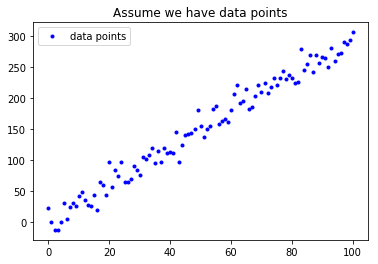

In [5]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

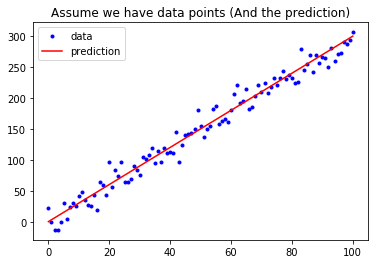

In [6]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [7]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 197.725
The Mean absolute error is 11.271
